# School and Broadband EDA

Geri Harding

In [49]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64

# School Enrollment Data


In [50]:
file = open("school_enrollment_clean.csv","r")
school_data = pd.read_csv("school_enrollment_clean.csv")

school_data

,id,total pop enrolled,percent total pop enrolled,margin total pop,county,state
0,0500000US01003,35912,79.0,1447,Baldwin County,Alabama
1,0500000US01015,17680,67.7,703,Calhoun County,Alabama
2,0500000US01043,13985,78.8,760,Cullman County,Alabama
3,0500000US01049,13367,86.8,617,DeKalb County,Alabama
4,0500000US01051,13077,72.0,544,Elmore County,Alabama
...,...,...,...,...,...,...
833,0500000US72113,19965,60.8,956,Ponce Municipio,Puerto Rico
834,0500000US72127,44217,56.6,1358,San Juan Municipio,Puerto Rico
835,0500000US72135,12180,70.4,1268,Toa Alta Municipio,Puerto Rico
836,0500000US72137,11050,63.9,541,Toa Baja Municipio,Puerto Rico


# School Enrollment Variables

id = County 
Total Pop Enrolled = 
Percent Total Pop Enrolled =
Margin Total Pop = 
County = 
State = 

# Preliminary EDA

### Which columns in your data sets will help you answer the questions posed by your problem statement?

1. Which columns represent the key pieces of information you want to examine (i.e.your target variables)?
Total Population 3 years and over enrolled in school in k-12

2. How many numerical, textual, datetime etc. columns are in your dataset?
Six

3. Pick out any similar columns among your disparate data sets for potential linking later on on the EDA process
id, State, County

### Explore Individual columns for preliminary insights
1. How many null values are present in your data (what percentage)?

0 when I run is NaN, however there are some (X) values listed in columns that I believe will be dropped


5. Explore any date/datetime columns for basic trends. How long is the period of time covered by the dataset? Do any seasonality trends immediately become apparent?
The dataset only covers one year at a time, once we slice off the irrelevant data we can merge the subsequent years onto this data. 

In [52]:
school_data['total pop enrolled'] = school_data['total pop enrolled'].astype(int)

2. Plot one-dimensional distributions of numerical columns (ex. histograms) and observe the overall shape of the data (i.e. normal distribution, skewed, multimodal, discontinuous

Total k-12 Population Enrolled, Data is skewed to the right probably by large population centers. For this data, it would be helpful to split the County and State Name. I would also like to see us catergorize counties by rural or urban dependent on population size. 

Percentage k-12 Population Enrolled is skewed to the left. 

Text(0.5, 1.0, 'Total k-12 Population Enrolled')

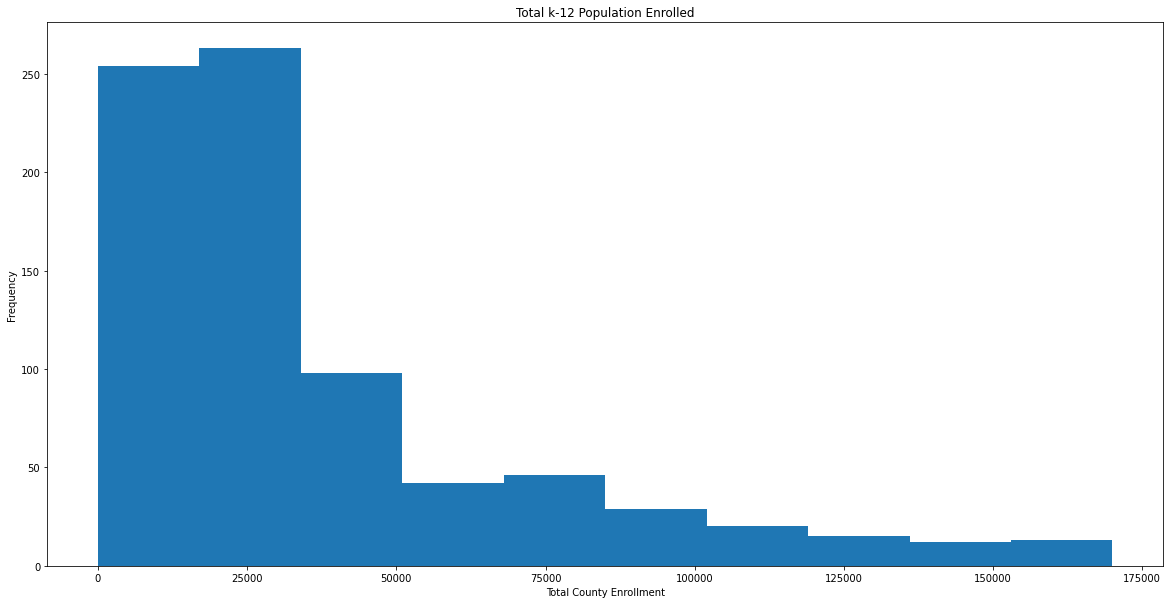

In [53]:
school_data["total pop enrolled"].plot.hist(range=[0.0, 170000], figsize = (20,10))
plt.xlabel("Total County Enrollment")
plt.title("Total k-12 Population Enrolled")

Text(0.5, 1.0, '70-75% of k-12 population is enrolled in school')

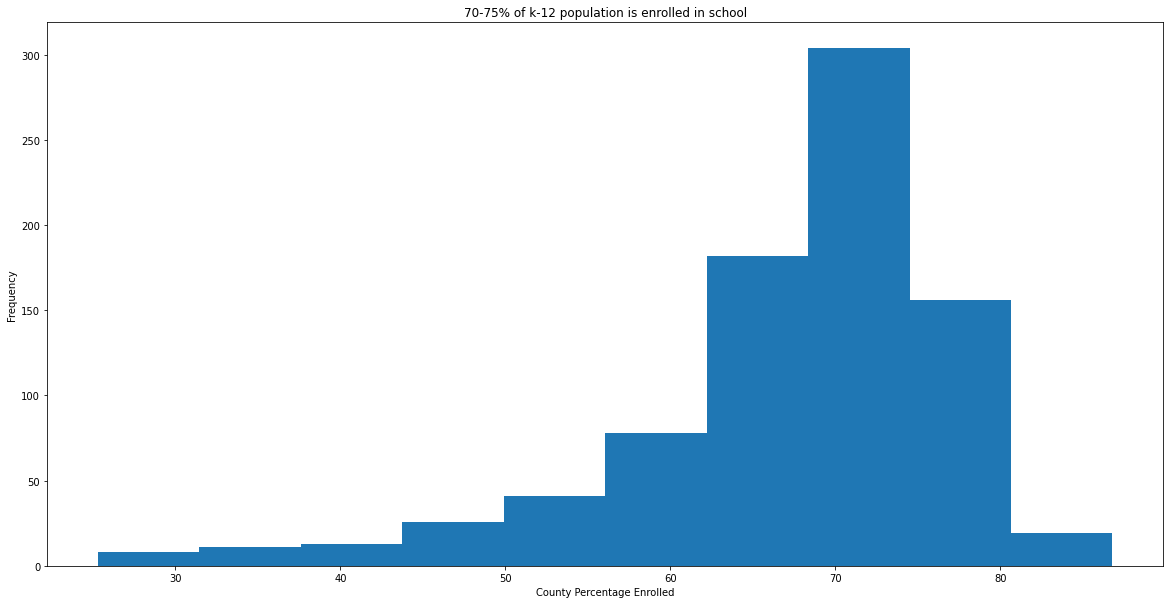

In [54]:
school_data["percent total pop enrolled"].plot.hist(figsize=(20, 10))
plt.xlabel("County Percentage Enrolled")
plt.title("70-75% of k-12 population is enrolled in school")

In [55]:
school_data["percent total pop enrolled"] = school_data["percent total pop enrolled"].astype(float)

3. Compute basic statistics of numerical columns

In [56]:
#Compute basic statistics using .describe()
school_data.describe()

,total pop enrolled,percent total pop enrolled,margin total pop
count,8.380000e+02,838.000000,838.000000
mean,5.495886e+04,67.313246,1324.628878
std,9.696190e+04,9.972154,766.914982
min,6.626000e+03,25.300000,360.000000
25%,1.549325e+04,63.900000,820.250000
50%,2.604700e+04,69.500000,1131.500000
75%,5.469300e+04,73.775000,1597.250000
max,1.590325e+06,86.800000,6803.000000


4. Calculate subgroup size of text/categorical data (such as the pd.value_counts() method)
There are 838 Geographic areas out of 3000 US counties

In [57]:
school_data["county"].count()

838

In [ ]:
school_data["total pop enrolled"].max()

Text(0.5, 0, 'Percentage of County Enrolled k-12')

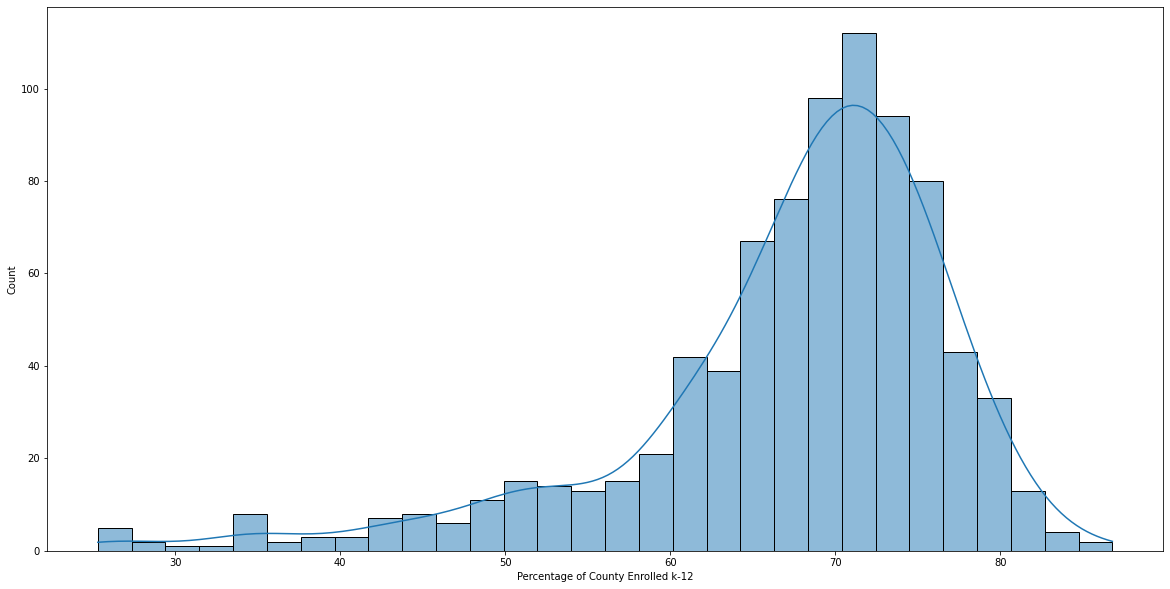

In [58]:
plt.figure(figsize=(20, 10))
sns.histplot(data=school_data,
             x="percent total pop enrolled",
             kde=True)
plt.xlabel("Percentage of County Enrolled k-12")


# Broadband Data 

In [59]:
#opened from csv from downloaded 
file = open("broadband_clean.csv","r")
broadband_data = pd.read_csv("broadband_clean.csv")
broadband_data

,county,year,id,cfips,state,broadband_pct
0,Autauga County,2000,0500000US01001,1001,Alabama,NaN
1,Autauga County,2001,0500000US01001,1001,Alabama,NaN
2,Autauga County,2002,0500000US01001,1001,Alabama,NaN
3,Autauga County,2003,0500000US01001,1001,Alabama,NaN
4,Autauga County,2004,0500000US01001,1001,Alabama,NaN
...,...,...,...,...,...,...
59522,Weston County,2014,0500000US56045,56045,Wyoming,NaN
59523,Weston County,2015,0500000US56045,56045,Wyoming,NaN
59524,Weston County,2016,0500000US56045,56045,Wyoming,NaN
59525,Weston County,2017,0500000US56045,56045,Wyoming,0.586207


# Broadband Variables

county =
year =
id =
cfips =
state =
broadband_pct =

# Preliminary EDA

Which columns in your data sets will help you answer the questions posed by
your problem statement?

1. Which columns represent the key pieces of information you want to examine (i.e.your target variables)?
Broadband Percentage

2. How many numerical, textual, datetime etc. columns are in your dataset?
Six

3. Pick out any similar columns among your disparate data sets for potential linking later on on the EDA process
State, County, FIPS Code

Explore Individual columns for preliminary insights

1. How many null values are present in your data (what percentage)?
46522 (78%)

I plan on using only 2017 and 2018 because the data is more complete for those years compared to 2000-2016.

In [60]:
#Number of null values (78%)
broadband_data.isna().sum()

county               0
year                 0
id                   0
cfips                0
state                0
broadband_pct    46522
dtype: int64

In [61]:
df_nonans = broadband_data.dropna()
df_nonans["year"].value_counts()

2018    3133
2017    3132
2014     817
2013     817
2015     813
2016     812
2012     328
2007     328
2009     328
2010     328
2008     328
2011     328
2003     217
2005     216
2004     216
2006     216
2002     216
2001     216
2000     216
Name: year, dtype: int64

2. Plot one-dimensional distributions of numerical columns (ex. histograms) and observe the overall shape of the data (i.e. normal distribution, skewed, multimodal, discontinuous
Data is skewed to the left

Text(0.5, 0, 'Broadband Percentage')

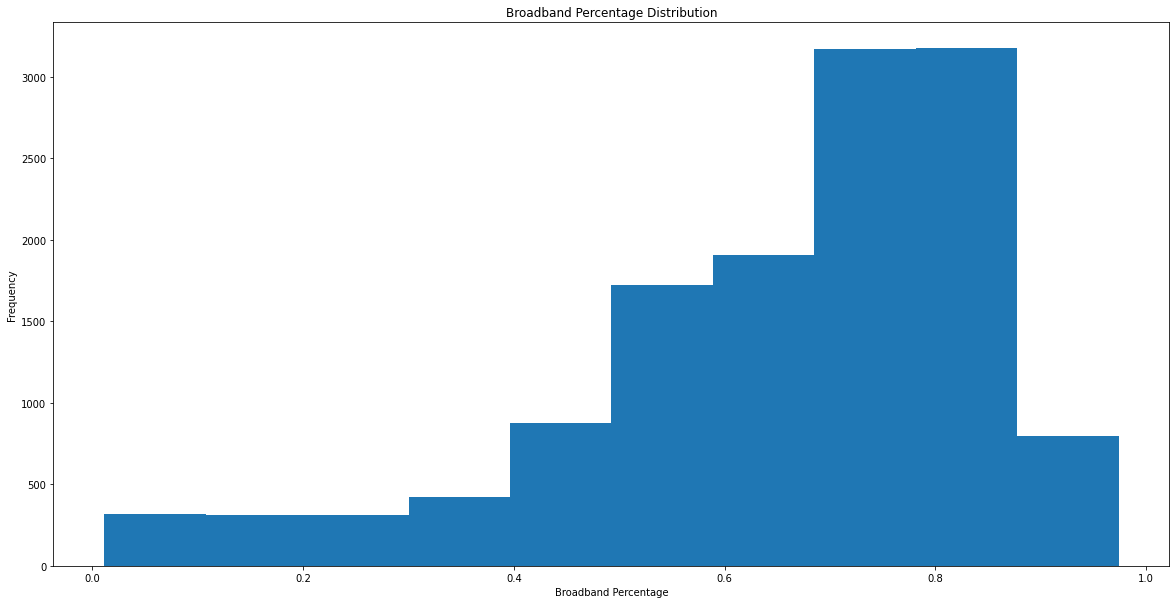

In [62]:
broadband_data["broadband_pct"].plot.hist(figsize=(20, 10))
plt.title("Broadband Percentage Distribution")
plt.xlabel("Broadband Percentage")

3. Compute basic statistics of numerical columns

In [63]:
#Compute basic stats
broadband_data["broadband_pct"].describe()

count    13005.000000
mean         0.654916
std          0.198363
min          0.011258
25%          0.554252
50%          0.710000
75%          0.800389
max          0.973881
Name: broadband_pct, dtype: float64

4. Calculate subgroup size of text/categorical data (such as the pd.value_counts() method)

There are 1867 counties out of the 3006 US counties

In [64]:
dfcounty = broadband_data["county"].drop_duplicates()
dfcounty

0           Autauga County
19          Baldwin County
38          Barbour County
57             Bibb County
76           Blount County
               ...        
59413      Sublette County
59432    Sweetwater County
59470         Uinta County
59489      Washakie County
59508        Weston County
Name: county, Length: 1867, dtype: object

5. Explore any date/datetime columns for basic trends. How long is the period of time covered by the dataset? Do any seasonality trends immediately become apparent?
More counties reported later on, it's not apparent if they were not reporting or did not have broadband at the time.

2000-2005 216-217
2008-2021 328
2016-2017 812-817
2017-2018 3132-3133

In [65]:
df_nonans = broadband_data.dropna()
df_nonans["year"].value_counts()

2018    3133
2017    3132
2014     817
2013     817
2015     813
2016     812
2012     328
2007     328
2009     328
2010     328
2008     328
2011     328
2003     217
2005     216
2004     216
2006     216
2002     216
2001     216
2000     216
Name: year, dtype: int64

In [66]:
broadband_data

,county,year,id,cfips,state,broadband_pct
0,Autauga County,2000,0500000US01001,1001,Alabama,NaN
1,Autauga County,2001,0500000US01001,1001,Alabama,NaN
2,Autauga County,2002,0500000US01001,1001,Alabama,NaN
3,Autauga County,2003,0500000US01001,1001,Alabama,NaN
4,Autauga County,2004,0500000US01001,1001,Alabama,NaN
...,...,...,...,...,...,...
59522,Weston County,2014,0500000US56045,56045,Wyoming,NaN
59523,Weston County,2015,0500000US56045,56045,Wyoming,NaN
59524,Weston County,2016,0500000US56045,56045,Wyoming,NaN
59525,Weston County,2017,0500000US56045,56045,Wyoming,0.586207


In [67]:
groups = broadband_data.groupby(["year"])
groups["broadband_pct"].mean()

year
2000    0.059311
2001    0.117304
2002    0.186497
2003    0.256267
2004    0.331101
2005    0.406512
2006    0.481923
2007    0.558201
2008    0.621270
2009    0.684339
2010    0.732841
2011    0.750490
2012    0.790154
2013    0.774656
2014    0.791269
2015    0.763797
2016    0.811734
2017    0.614880
2018    0.726917
Name: broadband_pct, dtype: float64

In [68]:
#Create df just for 2018 broadband data
eighteendata = broadband_data.sort_values(by = "county", ascending=True)
eighteendata = eighteendata[(eighteendata["year"] == 2018)]
eighteendata

,county,year,id,cfips,state,broadband_pct
43908,Abbeville County,2018,0500000US45001,45001,South Carolina,0.657
21070,Acadia Parish,2018,0500000US22001,22001,Louisiana,0.709
53427,Accomack County,2018,0500000US51001,51001,Virginia,0.638
10392,Ada County,2018,0500000US16001,16001,Idaho,0.812
14914,Adair County,2018,0500000US19001,19001,Iowa,0.720
...,...,...,...,...,...,...
5775,Yuma County,2018,0500000US08125,8125,Colorado,0.733
2070,Yuma County,2018,0500000US04027,4027,Arizona,0.763
52572,Zapata County,2018,0500000US48505,48505,Texas,0.541
52591,Zavala County,2018,0500000US48507,48507,Texas,0.483


In [84]:
#Merge broadband and school data
merged_data = pd.merge(eighteendata, school_data, on = "id")
merged_data = merged_data.sort_values(by = ["state_x", "county_x"], ascending = True)
merged_data = merged_data.rename(columns = {"county_x":"county", "state_x":"state"})
merged_data = merged_data.drop(columns = ["cfips", "county_y", "state_y"])
merged_data

,county,year,id,state,broadband_pct,total pop enrolled,percent total pop enrolled,margin total pop
33,Baldwin County,2018,0500000US01003,Alabama,0.781,35912,79.0,1447
101,Calhoun County,2018,0500000US01015,Alabama,0.730,17680,67.7,703
181,Cullman County,2018,0500000US01043,Alabama,0.699,13985,78.8,760
199,DeKalb County,2018,0500000US01049,Alabama,0.670,13367,86.8,617
232,Elmore County,2018,0500000US01051,Alabama,0.796,13077,72.0,544
...,...,...,...,...,...,...,...,...
781,Waukesha County,2018,0500000US55133,Wisconsin,0.888,66577,69.8,1072
805,Winnebago County,2018,0500000US55139,Wisconsin,0.816,25205,61.7,856
808,Wood County,2018,0500000US55141,Wisconsin,0.784,11256,76.1,557
406,Laramie County,2018,0500000US56021,Wyoming,0.839,16743,72.8,724


In [85]:
merged_data[['broadband_pct','total pop enrolled','percent total pop enrolled','margin total pop']].describe()

,broadband_pct,total pop enrolled,percent total pop enrolled,margin total pop
count,826.000000,8.260000e+02,826.000000,826.000000
mean,0.800386,5.551151e+04,67.408717,1332.631961
std,0.065099,9.754856e+04,9.984435,768.768270
min,0.380000,6.626000e+03,25.300000,360.000000
25%,0.763000,1.558775e+04,64.075000,829.250000
50%,0.806000,2.645450e+04,69.600000,1137.000000
75%,0.845000,5.603800e+04,73.800000,1602.750000
max,0.955000,1.590325e+06,86.800000,6803.000000


In [86]:
merged_data[['broadband_pct','total pop enrolled','percent total pop enrolled','margin total pop']].quantile([0.9,0.95,0.99])

,broadband_pct,total pop enrolled,percent total pop enrolled,margin total pop
0.90,0.87850,122743.50,76.85,2202.00
0.95,0.89475,190829.50,79.00,2723.25
0.99,0.92100,417587.25,82.10,4374.00


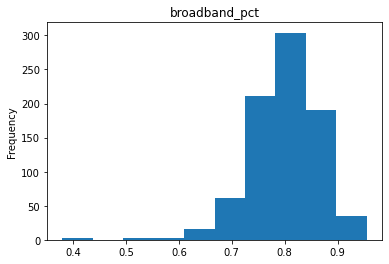

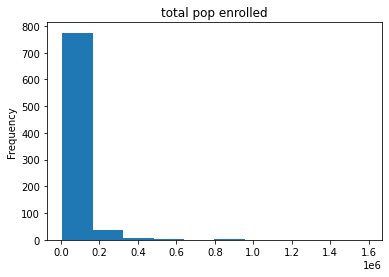

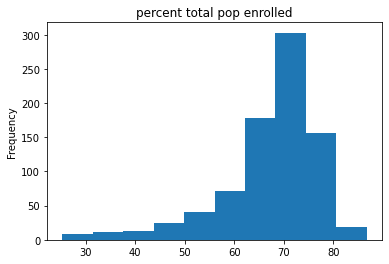

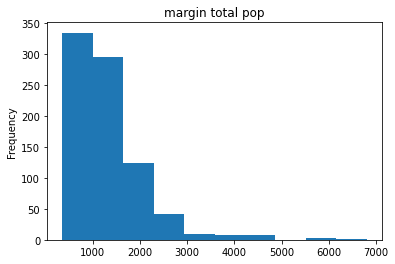

In [87]:
cols = merged_data[['broadband_pct','total pop enrolled','percent total pop enrolled','margin total pop']]
for col in cols:
    merged_data[col].plot.hist(title=col)
    plt.show()

In [90]:
corrm = merged_data.corr()
corrm

,year,broadband_pct,total pop enrolled,percent total pop enrolled,margin total pop
year,NaN,NaN,NaN,NaN,NaN
broadband_pct,NaN,1.000000,0.177922,-0.209104,0.219166
total pop enrolled,NaN,0.177922,1.000000,-0.048804,0.823838
percent total pop enrolled,NaN,-0.209104,-0.048804,1.000000,-0.074066
margin total pop,NaN,0.219166,0.823838,-0.074066,1.000000


In [91]:
cbn = merged_data.groupby("state")[["broadband_pct", "total pop enrolled"]].corr()
cbn

broadband_pct  total pop enrolled
state                                                              
Alabama       broadband_pct            1.000000            0.378968
              total pop enrolled       0.378968            1.000000
Alaska        broadband_pct            1.000000            0.971069
              total pop enrolled       0.971069            1.000000
Arizona       broadband_pct            1.000000            0.332207
...                                         ...                 ...
West Virginia total pop enrolled       0.209074            1.000000
Wisconsin     broadband_pct            1.000000           -0.068808
              total pop enrolled      -0.068808            1.000000
Wyoming       broadband_pct            1.000000            1.000000
              total pop enrolled       1.000000            1.000000

[102 rows x 2 columns]

In [107]:
merged_data.sort_values(['broadband_pct'], ascending=False).head(10)

,county,year,id,state,broadband_pct,total pop enrolled,percent total pop enrolled,margin total pop
213,Douglas County,2018,0500000US08035,Colorado,0.955,69347,74.1,1113
437,Loudoun County,2018,0500000US51107,Virginia,0.937,86128,71.6,1732
329,Howard County,2018,0500000US24027,Maryland,0.932,59842,67.6,1567
296,Hamilton County,2018,0500000US18057,Indiana,0.931,68134,74.6,1489
596,Prince William County,2018,0500000US51153,Virginia,0.931,94197,71.5,1515
241,Fairfax County,2018,0500000US51059,Virginia,0.930,200431,65.5,2062
703,Stafford County,2018,0500000US51179,Virginia,0.929,29699,68.5,1077
256,Forsyth County,2018,0500000US13117,Georgia,0.926,50658,73.4,990
202,Delaware County,2018,0500000US39041,Ohio,0.921,42071,75.7,1232
800,Williamson County,2018,0500000US47187,Tennessee,0.921,51375,78.3,1271


In [108]:
merged_data.sort_values(['total pop enrolled'], ascending=False).head(10)

,county,year,id,state,broadband_pct,total pop enrolled,percent total pop enrolled,margin total pop
436,Los Angeles County,2018,0500000US06037,California,0.821,1590325,61.2,5938
306,Harris County,2018,0500000US48201,Texas,0.810,904746,70.2,6803
173,Cook County,2018,0500000US17031,Illinois,0.789,819932,65.0,4803
458,Maricopa County,2018,0500000US04013,Arizona,0.841,768832,69.3,5556
554,Orange County,2018,0500000US06059,California,0.893,521182,61.0,3825
643,San Diego County,2018,0500000US06073,California,0.888,520746,60.6,4519
190,Dallas County,2018,0500000US48113,Texas,0.785,495329,72.4,4605
619,Riverside County,2018,0500000US06065,California,0.847,460779,68.3,4374
642,San Bernardino County,2018,0500000US06071,California,0.817,418455,67.9,4442
384,Kings County,2018,0500000US36047,New York,0.776,414984,65.8,3629


In [109]:
merged_data.sort_values(['percent total pop enrolled'], ascending=False).head(10)

,county,year,id,state,broadband_pct,total pop enrolled,percent total pop enrolled,margin total pop
199,DeKalb County,2018,0500000US01049,Alabama,0.670,13367,86.8,617
41,Bastrop County,2018,0500000US48021,Texas,0.805,16931,86.2,1063
525,Navajo County,2018,0500000US04017,Arizona,0.607,22196,84.5,677
23,Apache County,2018,0500000US04001,Arizona,0.380,15882,84.1,599
230,Elkhart County,2018,0500000US18039,Indiana,0.770,39454,83.4,1514
308,Harrison County,2018,0500000US54033,West Virginia,0.755,11050,82.9,814
250,Flathead County,2018,0500000US30029,Montana,0.819,16010,82.2,893
307,Harrison County,2018,0500000US48203,Texas,0.640,14101,82.2,1112
695,St. Landry Parish,2018,0500000US22097,Louisiana,0.637,15509,82.1,940
668,Sevier County,2018,0500000US47155,Tennessee,0.757,14728,82.1,1022


Text(0, 0.5, 'Total Population Enrolled')

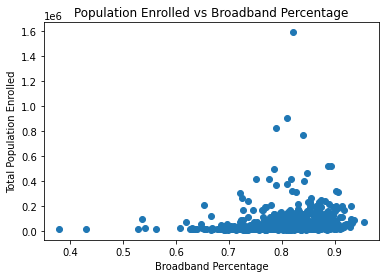

In [99]:
plt.scatter(x = merged_data["broadband_pct"], y = merged_data["total pop enrolled"]) # The plot
plt.title("Population Enrolled vs Broadband Percentage") # Adding a title
plt.xlabel("Broadband Percentage") # Adding axis labels
plt.ylabel("Total Population Enrolled")

# Conclusions

I would want to add population data to this to categorize counties as Rural or Urban by population size. I would use that as one of my main variables along with broadband percentage. 

Questions to Answer
Plot two-dimensional distributions of your variables of interest against your target variable(s).
○ Across different values of your independent variable, how does the dependent
variable change?
○ Which interactions of variables provide the most interesting insights?
○ What trends do you see in the


Analyze any correlations between your independent and dependent variables

○ Understand and resolve surprising correlations between these variables, and usethis information to validate your initial hypothesis.

The broadband percentage is lower or nonexistent in rural counties (From the counties I know are Urban vs Rural in LA, will be able to determine once I add the new column in). 